# Occlusion Part 2, Summer 2022, 
- **Focus:** A basic anaylsis of continuous behavioral data
- **Author(s):** Austin Behel
- **Date Notebook Last Modified:** 10.10.2022
- **Quick Description:** Analysis of behavioral dataframes of experiments with similar paradigms, with continuous, numeric data types (n=20, numOfDataframes=40):
> Indented block
    - "speeds"
> Indented block
    - "tempest", i.e., Temporal Estimation⏳

---

## Code Outline

0. Setting up filestream access and imports.
1. Set up data folders and create initial dataframes.
2. pulling out dictionaries
3. speeds experiment analysis
4. temporal estimation analysis
5. speeds vs sound comparison of speed



## IMPORTANT TIPS
- Variables created in script will be in format firstLast
- Columns within dataframes will be in format first_last

### **0. Setting up filestream access and imports**


In [ ]:
# Create mount (Initial pathway to files being used in Drive)
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/work/occlusion_studies/")

Mounted at /content/drive/


In [ ]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **1. Set up data folders and create initial dataframes (dataSpeeds, dataTempest, dataSound, dataJumpsize).**

In [ ]:
# setup
dataFolderSpeeds = './occBehP2_2022/data_speeds'
dataFolderTempest = './occBehP2_2022/data_temporal_estimation'
dataFolderSound = './occBehP1_2022/data_sound'

#-------------------------------------------------------------------------------
# load, append, and concatenate participant datasets (pts=20, counted sequentially) into the list
ptsIds = list(range(1,22)); #
ptsIds2 = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
numPts = len(ptsIds)

'''
LOADING SPEED EXPERIMENT
'''
# create empty list to add data from Speed
dfsList = []

# run through all participant csv's in the folder "data_speeds", create a list, and then staple all lists together
for i in range(numPts):
    tempDf = pd.read_csv(dataFolderSpeeds + "/P" + str(ptsIds[i]) + "_trialmat.csv")
    dfsList.append(tempDf) #bring all created pt lists into the original list

# bring all lists together under one pandas dataframe
dataSpeeds = pd.concat(dfsList)

# reset index and drop index column
dataSpeeds = dataSpeeds.reset_index()
dataSpeeds = dataSpeeds.drop('Unnamed: 0', axis = 1)
dataSpeeds = dataSpeeds.drop('index', axis = 1)

##############################################################################
##############################################################################

'''
LOADING TEMPORAL ESTIMATION EXPERIMENT
'''
# dump the list from before to fill with Tempest data
dfsList = []
 
# load, append, and concatenate datasets into the list
for i in range(numPts):
    tempDf = pd.read_csv(dataFolderTempest + "/P" + str(ptsIds[i]) + "_trialmat.csv")
    dfsList.append(tempDf) #bring all created pt lists into the original list

# bring all lists together under one pandas dataframe
dataTempest = pd.concat(dfsList)


# reset index and drop index column
dataTempest = dataTempest.reset_index()
dataTempest = dataTempest.drop('Unnamed: 0', axis = 1)
dataTempest = dataTempest.drop('index', axis = 1)


##############################################################################
##############################################################################

'''
LOADING SOUND EXPERIMENT
'''


# create empty list
dfs_list = []
# load, append, and concatenate datasets into the list
ptsIdsSound= [3,4,5,6,7,8,9,11,12,17,18,19,20,21,22,23,24,25,26,27]

numPtsSound = len(ptsIdsSound)
 
for i in range(numPtsSound):
   temp_df = pd.read_csv(dataFolderSound + "/P" + str(ptsIdsSound[i]) + "_trialmat.csv")
   #bring all created pt lists into the original list
   dfs_list.append(temp_df)
 
#bring all lists together under one pandas dataframe
dataSound = pd.concat(dfs_list)

dataSound = dataSound.reset_index()
dataSound = dataSound.drop('Unnamed: 0', axis = 1)


### 2. Pulling out unique values for dictionaries: dictTempest & dictSpeeds

In [ ]:
#pull out unique values for creation of dictionary in Tempest experiment data

''' 
Speeds Experiment
'''

#create copy to not modify data
speeds = dataSpeeds.copy()
columns1 = speeds.columns #get column names

#for each column, get the sorted and unique values
list1= []
for i in columns1:
  short = speeds[i].unique()
  list1.append(short)

#bring these values into a dataframe and correct the axes back to original
df = pd.DataFrame(data = list1)
df = df.swapaxes('index','columns')
df.columns = columns1

##############################################################################
##############################################################################

'''
Temporal Estimation Experiment
'''

#create copy to not modify data
tempest = dataTempest.copy()
columns2 = tempest.columns #get column names

#for each column, get the sorted and unique values
list2= []
for i in columns2:
  short = tempest[i].unique()
  list2.append(short)

#bring these values into a dataframe and correct the axes back to original
df2 = pd.DataFrame(data = list2)
df2 = df2.swapaxes('index','columns')
df2.columns = columns2



In [ ]:
''' 
Speeds Experiment
'''

dictSpeeds = {'participantNumber': df['participant'].dropna(),                  # 20 participants
               'blockNumber': df['block'].dropna(),                             # 6 block design, all blocks have counterbalanced trials
               'trialNumber': np.sort(df['trial'].dropna()),                    # 42 total trials per block, although the trial count in 
                                                                                    #the code only went up to 7. This repeats 6 times = 6X7=42
              '''
              Need to figure out which of the 7 trials correspond
              '''

                  # Direction that object travelled on screen
                  'leftToRight': df['direction'][0], 
                  'rightToLeft': df['direction'][1],

              # Where on the screen the object started
              'startPosPix': np.sort(df['start_pos'].dropna()),                 # 4 values
              'startPosDeg': np.sort(df['start_pos_deg'].dropna()),             # 4 values 
            
                  # Information on speed of object traveled on screen
                  'indexOfSpeed': np.sort(df['speed_idx'].dropna()),            # 3 speeds total
                  'totalTime': np.sort(df['total_time'].dropna()),              # 3 different times
                  'totalTime': np.sort(df['total_time'].dropna()),              # 3 times
                  'trialTime': np.sort(df['trial_time'].dropna()),              # 21 speeds
                  'pixPerSec': np.sort(df['pix_per_sec'].dropna()),             # 3 speeds
                  'pixPerRefresh': np.sort(df['pix_per_refresh'].dropna()),

              # Where on the screen the object stopped moving
              'stopPosPix': np.sort(df['stop_pos'].dropna()),                   # 7 stopping locations behind occluder
              'stopPosDeg': np.sort(df['stop_pos_deg'].dropna()),               # 7 values
              
              # The following is in the dataframe/code, but seems null in purpose
              'reappearanceTime': np.sort(df['reappearance_time'].dropna()),
              'reappearanceLocPix': np.sort(df['reappearance_loc'].dropna()),
              'reappearanceLocDeg': np.sort(df['reappearance_loc_deg'].dropna()),
                             
}

##############################################################################
##############################################################################

'''
Temporal Estimation Experiment
'''

dictTempest = {'participantNumber': df2['participant'].dropna(),                # 20 participants
               'blockNumber': df2['block'].dropna(),                            # 8 block design, all blocks have counterbalanced trials
               'trialNumber': df2['trial'].dropna(),                            # 24 total trials

                  # Direction that object travelled on screen
                  'leftToRight': df2['direction'][0], 
                  'rightToLeft': df2['direction'][1],

              # Where on the screen the object started
              'startPosPix': np.sort(df2['start_pos'].dropna()),                # 12 starting positions          
              'startPosDeg': np.sort(df2['start_pos_deg'].dropna()),            # 12 values         
            
                  # Information on speed of object traveled on screen
                  'indexOfSpeed': np.sort(df2['speed_idx'].dropna()),           # 12 speeds total
                  'totalTime': np.sort(df2['total_time'].dropna()),             # 12 different times
                  'degPerSec': np.sort(df2['deg_per_sec'].dropna()),            # 12 speeds
                  'pixPerSec': np.sort(df2['pix_per_sec'].dropna()),            #12 speeds
                  'pixPerRefresh': np.sort(df2['pix_per_refresh'].dropna()),

              # Where on the screen the object should have "stopped"
              'reappearanceTime': np.sort(df2['reappearance_time'].dropna()),
              'reappearanceLocPix': np.sort(df2['reappearance_loc'].dropna()),
              'reappearanceLocDeg': np.sort(df2['reappearance_loc_deg'].dropna()),
                             
}



### 3. Speeds Experiment Analyses

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

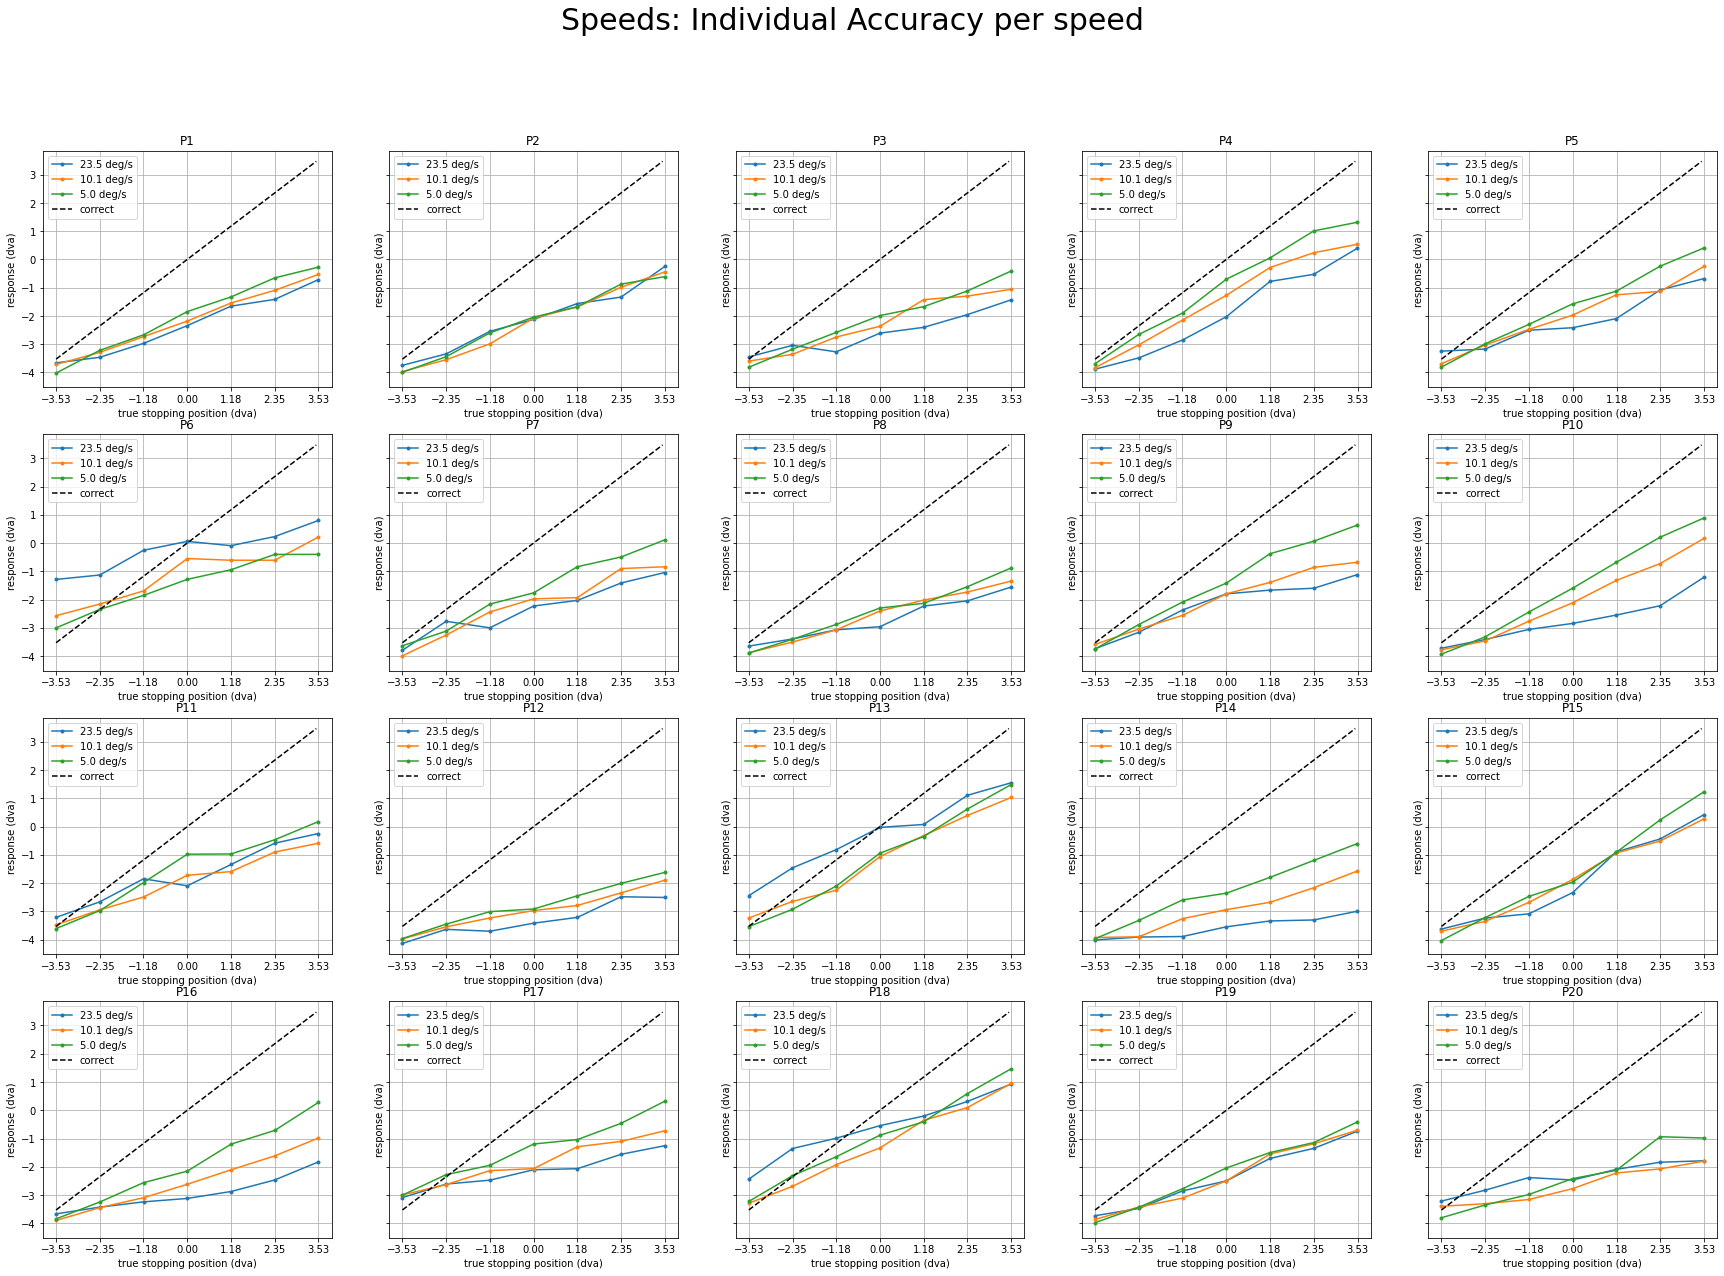

In [ ]:
''' 
#running through each participants trial matrix, pull out values in each of the three speed indexes.
#plot the error mean for each stopping position (7) for each of the three speeds
#there will be one plot for each participant, all plotted within a single figure
'''


#initiate plots
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(30,20), sharey = True)
fig.suptitle('Speeds: Individual Accuracy per speed', size = 30)
colors = sns.color_palette('tab10') #colors for plotting within loop
axs=axs.flatten() #needed to reshape

for i,p in enumerate(ptsIds): #for the index of a participants ID
  ax = axs[i] #on a given axis coord
  
  for speed in range(len(dataSpeeds.speed_idx.unique())): #for each speed in the range of indices
      ptData = dataSpeeds.loc[dataSpeeds['participant']=="P"+str(p),:] #pulling out one participant at a time
      replication = ptData.loc[ptData.speed_idx==speed,:] #pulling out stopping locations and responses in one speed at a time

      # Flip the traveling direction of object when it is traveling right to left so that it matches with left to right
      # Do this for 1)when the object stopped and 2)where the subject responded
      replication.loc[replication.direction == 2,'stop_pos_deg']=replication.loc[replication.direction == 2,'stop_pos_deg']*-1
      replication.loc[replication.direction == 2,'pos_pressed_deg']=replication.loc[replication.direction == 2,'pos_pressed_deg']*-1

      #plotting the mean response (y) for each stopping position of the above speed
      ax.plot(replication.groupby('stop_pos_deg').mean().pos_pressed_deg,'k.-',color=colors[speed],label=str(float(replication.deg_per_sec.unique().round(1))) + ' deg/s')
      
  #adding these plots to the first initiated graph
  ax.plot(np.arange(replication.stop_pos_deg.min(),replication.stop_pos_deg.max()),np.arange(replication.stop_pos_deg.min(),replication.stop_pos_deg.max()),'k--',label='correct')

  # cleanup
  ax.legend()
  ax.set_xlabel('true stopping position (dva)')
  ax.set_ylabel('response (dva)')
  ax.set_xticks(dataSpeeds['stop_pos_deg'].unique().round(2))
  ax.grid(which='both')
  ax.set_title("P" + str(p))

# plt.savefig('./Figures/Speeds_Individual_Accuracy_Per_Speed.jpeg',dpi=200,bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


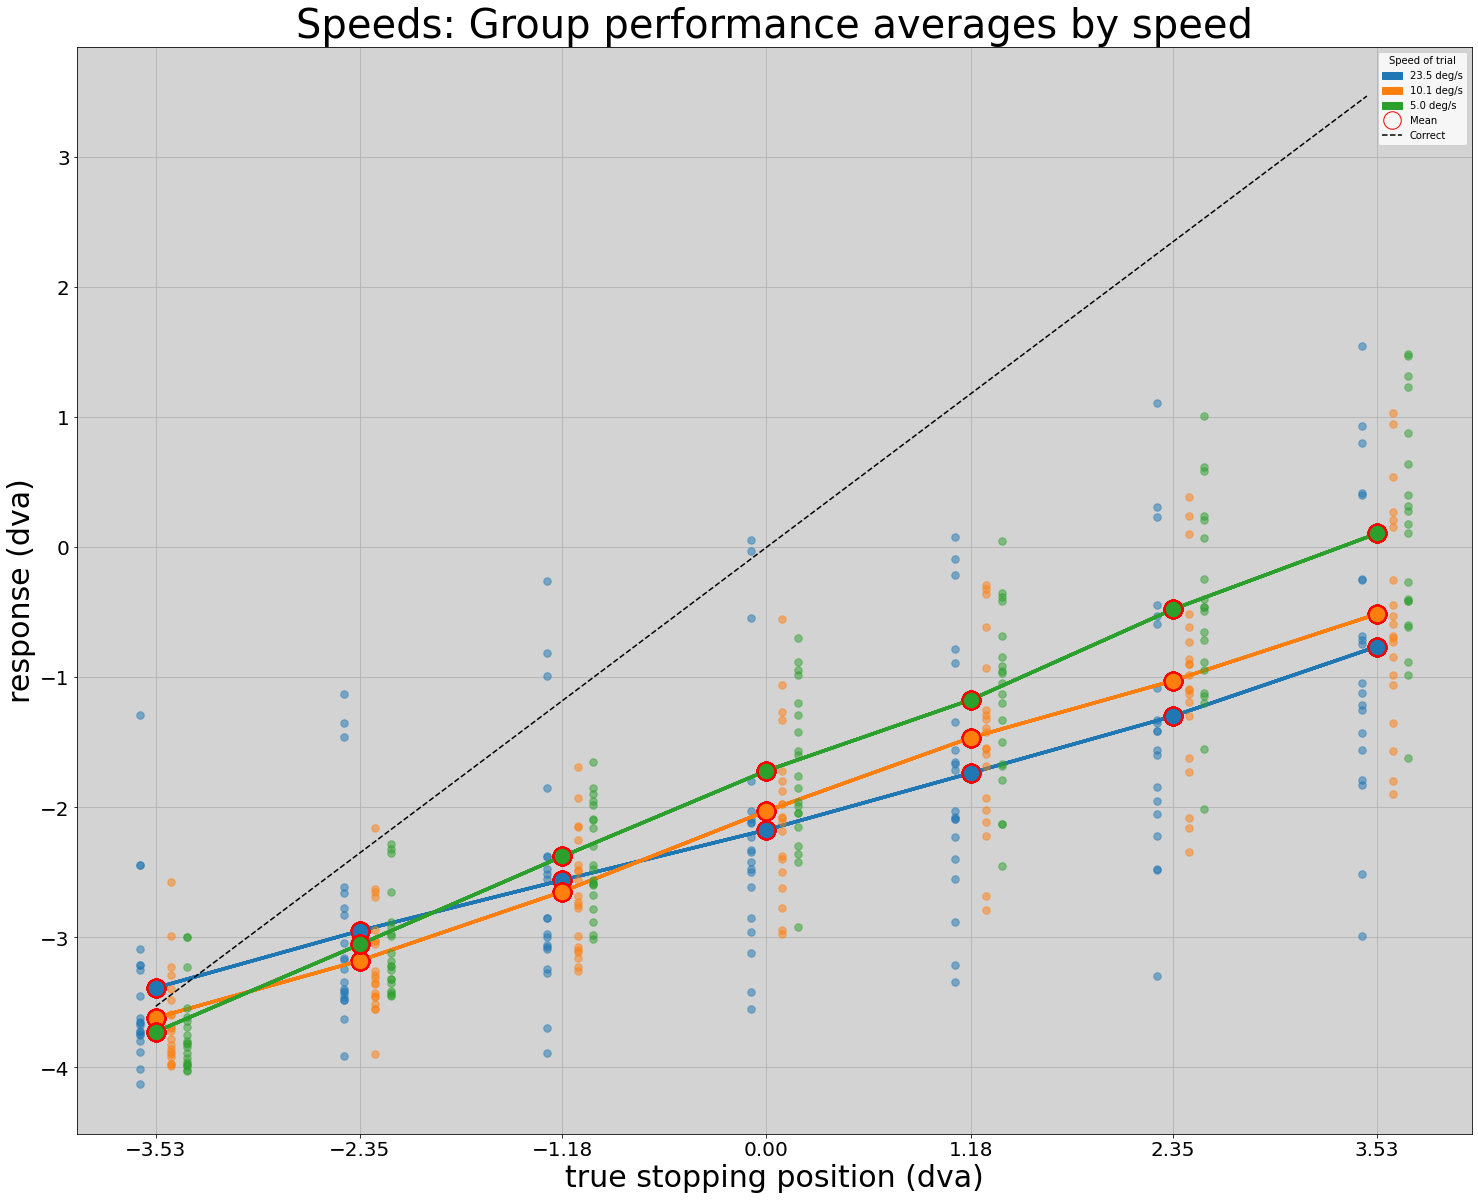

In [ ]:
''' 
Viewing the above, plotted in the same plane
'''


dat = dataSpeeds.copy()
# Flip the traveling direction of object when it is traveling right to left so that it matches with left to right
# Do this for 1)when the object stopped and 2)where the subject responded
dat.loc[dat.direction == 2,'stop_pos_deg']=dat.loc[dat.direction == 2,'stop_pos_deg']*-1
dat.loc[dat.direction == 2,'pos_pressed_deg']=dat.loc[dat.direction == 2,'pos_pressed_deg']*-1

#init plot
fig, ax = plt.subplots(figsize=(25, 20))
colors = sns.color_palette('tab10') #colors for plotting within loop
list1= [] # empty list for data
jitter = [-0.09, 0.09, 0.18]

for speed in range(len(dat.speed_idx.unique())): #for unique speed  (one of three)

    toplot = dat.loc[dat['speed_idx']==speed].copy() #pull out speed
    means_toplot = toplot.groupby('stop_pos_deg').mean()['pos_pressed_deg'] #get the means of position pressed for each stopping position

    for i,p in enumerate(ptsIds): #for index of current participant trial matrix
    
        ptData = dat.loc[dat['participant']=="P"+str(p),:] #this participant
        replication = ptData.loc[ptData.speed_idx==speed,:] #for this speed

        #get averages
        averages = replication.groupby('stop_pos_deg').mean().reset_index()
        
        x = averages['stop_pos_deg'].round(2)
        y = averages['pos_pressed_deg'].round(2)
        z = dat['speed_idx'].unique()
        #init plot
        ax.plot(x,means_toplot, color = colors[speed], lw = 3, label = '')
        ax.plot(x,means_toplot,color = colors[speed],marker='.',lw=0,markersize = 35,mec = 'red',mew = 2, alpha= 1,)
        ax.plot(x+jitter[speed],y,color = colors[speed],marker='.',lw=0,markersize = 15, alpha= 0.5, label = '')
        
        #add all averages to one dataframe
        list1.append(averages)

plt.legend()

dat = dataSpeeds.copy()
dat.loc[dat.direction == 2,'stop_pos_deg']=dat.loc[dat.direction == 2,'stop_pos_deg']*-1
dat.loc[dat.direction == 2,'pos_pressed_deg']=dat.loc[dat.direction == 2,'pos_pressed_deg']*-1

# line in plot showing the "perfect performance"
plt.plot(np.arange(dat.stop_pos_deg.min(),dat.stop_pos_deg.max()),np.arange(dat.stop_pos_deg.min(),dat.stop_pos_deg.max()),'k--',label='correct')

'''
adding chart features
'''
import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color=colors[0], label='23.5 deg/s')
ora_patch = mpatches.Patch(color=colors[1], label='10.1 deg/s')
green_patch = mpatches.Patch(color=colors[2], label='5.0 deg/s')

import matplotlib.lines as mlines
blue_star = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                          markersize=35, fillstyle = 'none' ,label='Mean')

correct_line = mlines.Line2D([], [], color='black', linestyle='--',
                          markersize=35, fillstyle = 'none' ,label='Correct')


plt.legend(handles=[blue_patch, ora_patch,green_patch ,blue_star, correct_line], title = 'Speed of trial')
plt.xlabel('true stopping position (dva)', size = 30)
plt.ylabel('response (dva)',size = 30)
# plt.xticks(dat['stop_pos_deg'].unique().round(2))
plt.title('Speeds: Group performance averages by speed', size = 40)
plt.grid(which='both')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.set_xticks(averages['stop_pos_deg'].round(2).unique())
ax.set_facecolor('lightgrey')


plt.savefig('./Figures/Speeds_Means_by_Speed.jpeg',dpi=200,bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


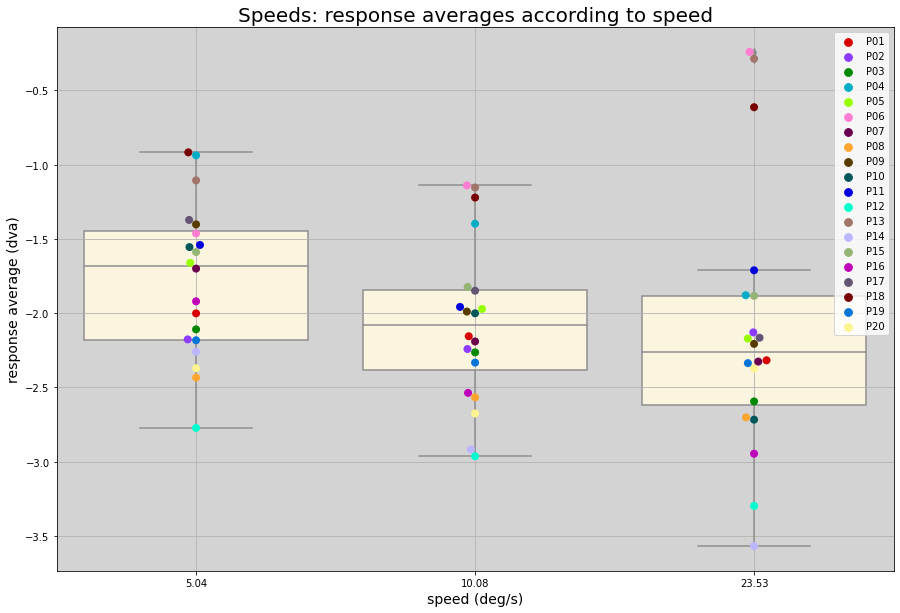

In [ ]:
'''
observing measurable change in boxplots, comparison between the three speeds
'''

dat = dataSpeeds.copy() 

'''
creating a new column of participant IDs with the format 01,02,...10,11
this is preferred to the format of 1,2,..10,11 while plotting because of the reading of sequential numbers in strings
'''

newptsIds = ptsIds.copy() ; newptsIds = np.array(newptsIds).flatten() ; newptsIds = newptsIds[0:9]
txtt =[]

for i, p in enumerate(newptsIds):
    x = 'P'+str(0)+str(i+1)
    txtt.append(x)
txtt = np.array(txtt).flatten()

t  = dat['participant'].unique()
txttt =t[9:20]

l = [] ; r = list(txtt) ; e = list(txttt) ; b = r+e
b = np.sort(np.flip(b))

p = dat['participant'].unique()

dat['participant1'] = dat.participant.replace(p, b, inplace=False)

'''
plotting
'''

import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=20)

#change direction of travel trajectory of 1/2 the data
dat.loc[dat.direction == 2,'stop_pos_deg']=dat.loc[dat.direction == 2,'stop_pos_deg']*-1
dat.loc[dat.direction == 2,'pos_pressed_deg']=dat.loc[dat.direction == 2,'pos_pressed_deg']*-1

#sort data by participant, then by time of reappearance (11)
dat = dat.groupby(['participant1', 'reappearance_time']).mean().reset_index()

x = dat['stop_pos_deg'].round(2)
y = dat['pos_pressed_deg']
z = dat['participant1']
a = dat['newRt'] = y-x
b = dat['deg_per_sec'].round(2)

# Initialize the figure
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.boxplot(b,y, color = 'cornsilk')
ax = sns.swarmplot(x=b,y=y, hue=z,  size= 8, palette = palette)

plt.legend()
plt.xlabel('speed (deg/s)', size=14)
plt.ylabel('response average (dva)', size = 14)
plt.title('Speeds: response averages according to speed', size=20)
plt.grid()
ax.set_facecolor('lightgrey')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


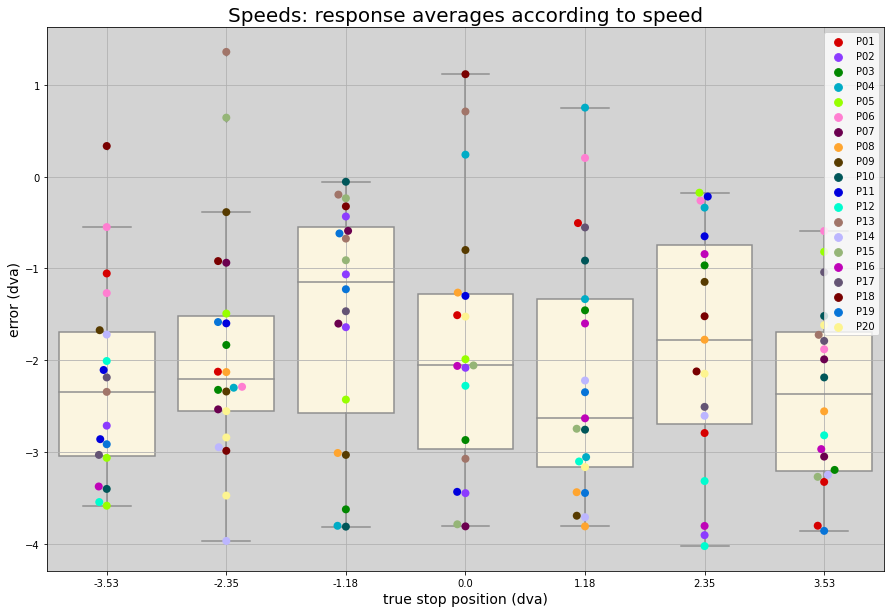

In [ ]:
'''
viewing in boxplot form to look between stopping positions
'''

dat = dataSpeeds.copy() 

'''
code to create a new column of participant IDs with the format 01,02,...10,11
this is preferred to the format of 1,2,..10,11 while plotting because of the reading of sequential numbers in strings
'''

newptsIds = ptsIds.copy() ; newptsIds = np.array(newptsIds).flatten() ; newptsIds = newptsIds[0:9]
txtt =[]

for i, p in enumerate(newptsIds):
    x = 'P'+str(0)+str(i+1)
    txtt.append(x)
txtt = np.array(txtt).flatten()

t  = dat['participant'].unique()
txttt =t[9:20]

l = [] ; r = list(txtt) ; e = list(txttt) ; b = r+e
b = np.sort(np.flip(b))

p = dat['participant'].unique()

dat['participant1'] = dat.participant.replace(p, b, inplace=False)

'''
end
'''
import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=20)

# change direction of 1/2 trials
dat.loc[dat.direction == 2,'stop_pos_deg']=dat.loc[dat.direction == 2,'stop_pos_deg']*-1
dat.loc[dat.direction == 2,'pos_pressed_deg']=dat.loc[dat.direction == 2,'pos_pressed_deg']*-1

#making copy of data to use after the following groupby()
dat2= dat.copy()

#grouping data, getting mean
dat = dat.groupby(['participant1', 'stop_pos_deg']).mean().reset_index()

#setting up for plotting
x = dat2['stop_pos_deg'].round(2)
y = dat['pos_pressed_deg']
z = dat['participant1']
a = dat['newRt'] = y-x
b = dat['deg_per_sec'].round(2)
c = dat['error_deg']

# Initialize the figure
f, ax = plt.subplots(figsize=(15, 10))

#plot
ax = sns.boxplot(x,y, color = 'cornsilk')
ax = sns.swarmplot(x=x,y=y, hue=z,  size= 8, palette = palette)

#clean up
plt.legend()
plt.xlabel('true stop position (dva)', size=14)
plt.ylabel('error (dva)', size = 14)
plt.title('Speeds: response averages according to speed', size=20)
plt.grid()
ax.set_facecolor('lightgrey')

### 4. Temporal Estimation Analyses

IndexError: ignored

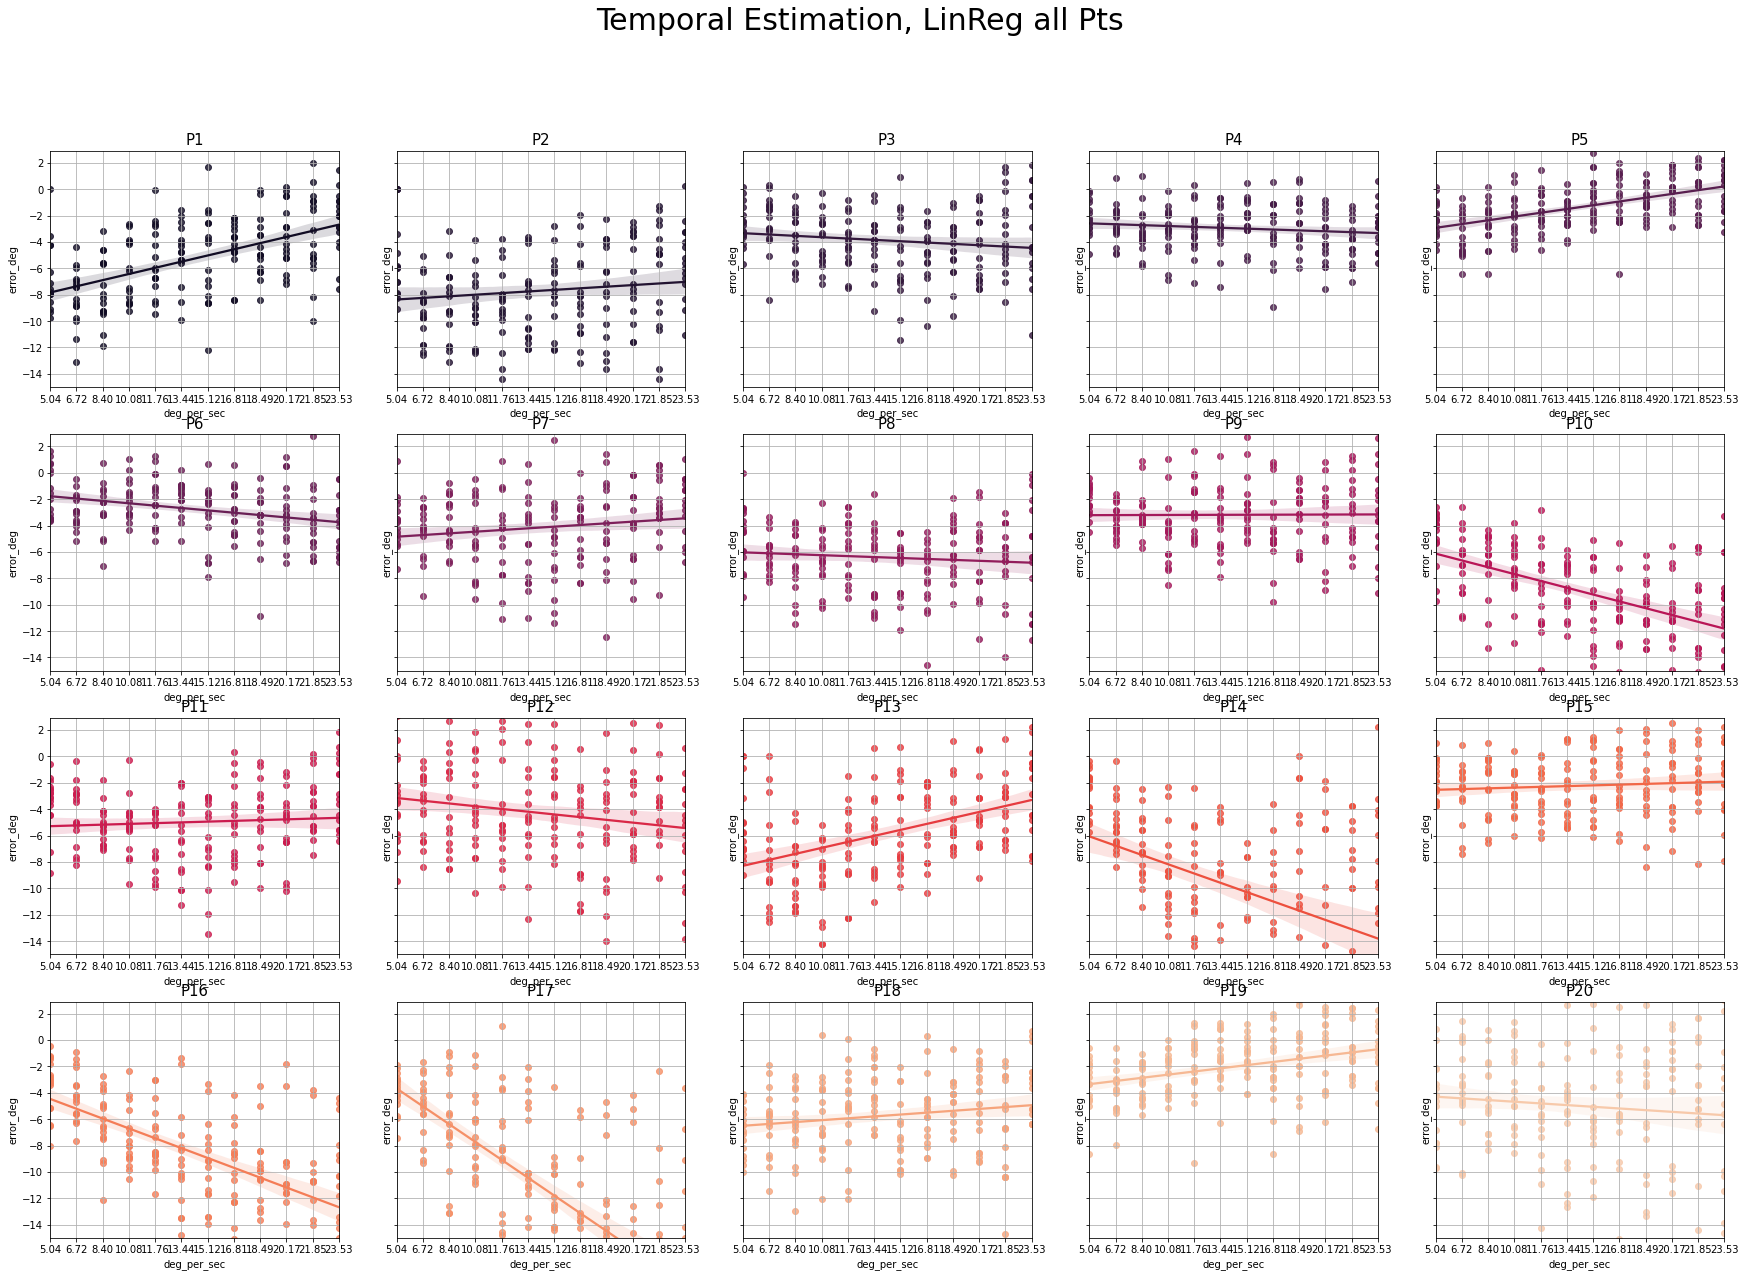

In [ ]:
'''
viewing all participants linear regression performance
'''

#new copy
dat = dataTempest.copy()

#switch direction of 1/2 trials
dat.loc[dat.direction == 2,'pos_pressed']=dat.loc[dat.direction == 2,'pos_pressed']*-1

#init plot
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(30,20), sharey = True)
fig.suptitle('Temporal Estimation, LinReg all Pts', size = 30)
axs=axs.flatten()
colors = sns.color_palette(palette = 'rocket',n_colors=len(ptsIds))

for i,p in enumerate(ptsIds): # for index of current participant
    ax = axs[i] #along location of above initated plot
    ptData = dat.loc[dat['participant']=="P"+str(p),:] 
    nd_4plt = ptData.copy()

    #plot
    sns.regplot(x=nd_4plt['deg_per_sec'], y=nd_4plt['error_deg'], color = colors[i], ax = ax)

    #clean
    ax.set_title('P' + str(p), size = 15)
    unique = nd_4plt["deg_per_sec"].unique()
    ax.set_xticks(unique)
    ax.set_xlim([np.min(unique), np.max(unique)])
    ax.set_ylim(-15, )
    ax.grid(which='both')

plt.subplots_adjust(wspace=0.2,hspace=0.25) 
# plt.savefig('./Figures/Tempest_LinReg_with_outliers.jpeg',dpi=200,bbox_inches='tight')

IndexError: ignored

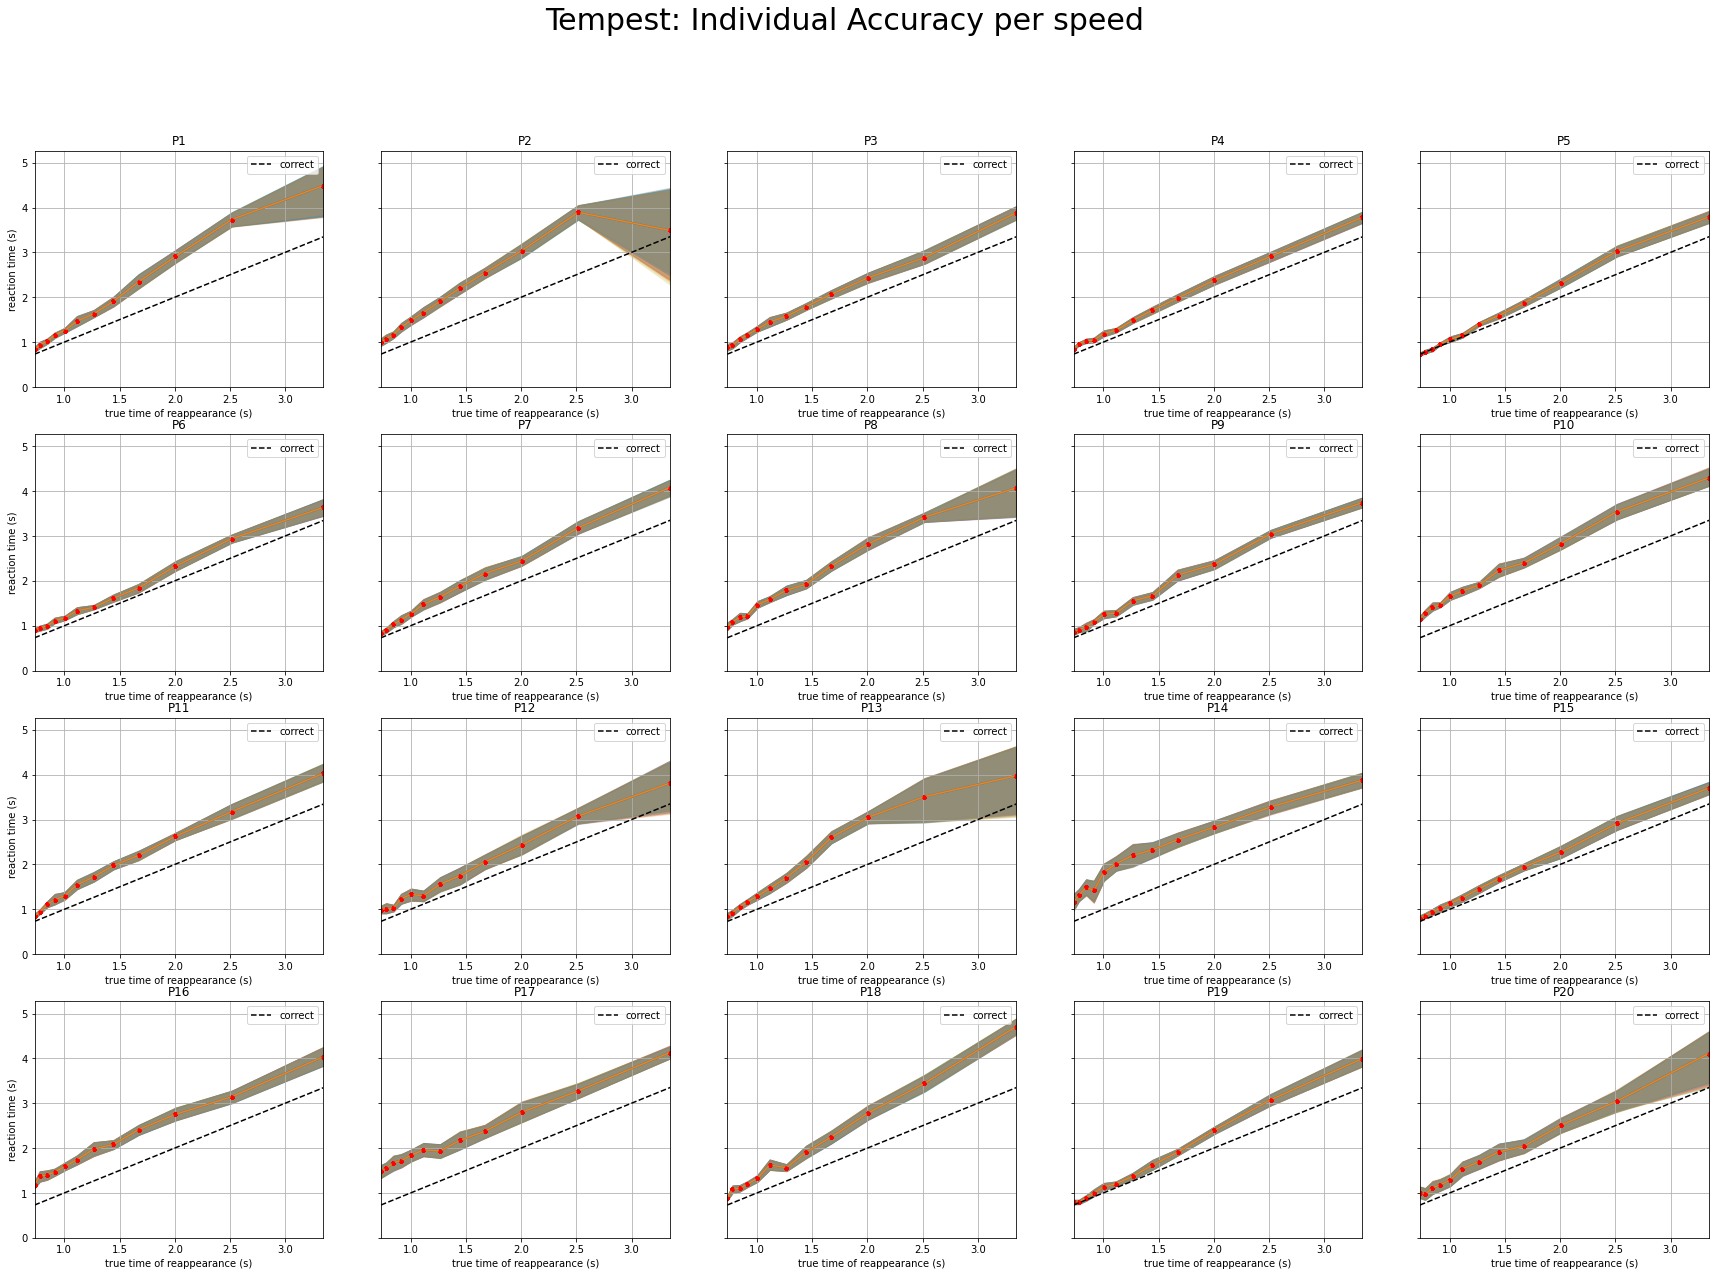

In [ ]:
'''
viewing variation in performance for each individual, plotted in one figure
'''

#init plot
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(30,20), sharey= True)
fig.suptitle('Tempest: Individual Accuracy per speed', size = 30)
axs=axs.flatten()
colors = sns.color_palette('tab20') #colors for plotting within loop

for i,p in enumerate(ptsIds): # for index of current participant
  ax = axs[i] #this is the current axes of the figure that was initiated above
  
  for speed in range(len(dataTempest.speed_idx.unique())): #for this particpant, take the speed (one of 11)
      ptData = dataTempest.loc[dataTempest['participant']=="P"+str(p),:]
      x = ptData['reappearance_time']
      y = ptData['rt']
      z = ptData['participant']
      sns.lineplot(x=x, y=y, ax=ax) #plot 

      ax.plot(ptData.groupby('reappearance_time').mean()['rt'], 'r.') #also plot
                                                                                          # ,label=str(float(replication.deg_per_sec.unique().round(0))) + ' deg/s'
      
  #drawing a line that represents 'perfect performance'
  ax.plot(np.arange(ptData.reappearance_time.min(),1.2*(ptData.reappearance_time.max())),np.arange(ptData.reappearance_time.min(),1.2*(ptData.reappearance_time.max())),'k--',label='correct')


  #clean up 
  ax.legend()
  ax.set_xlabel('true time of reappearance (s)')
  ax.set_ylabel('reaction time (s)')
  ax.set_xlim(ptData.reappearance_time.min(),ptData.reappearance_time.max())
  ax.set_ylim(ptData.rt.min(),ptData.rt.max())
  ax.grid(which='both')
  ax.set_title("P" + str(p))

# plt.savefig('./Figures/Tempest_Lineplot_Individual_Accuracy_Per_Speed.jpeg',dpi=200,bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


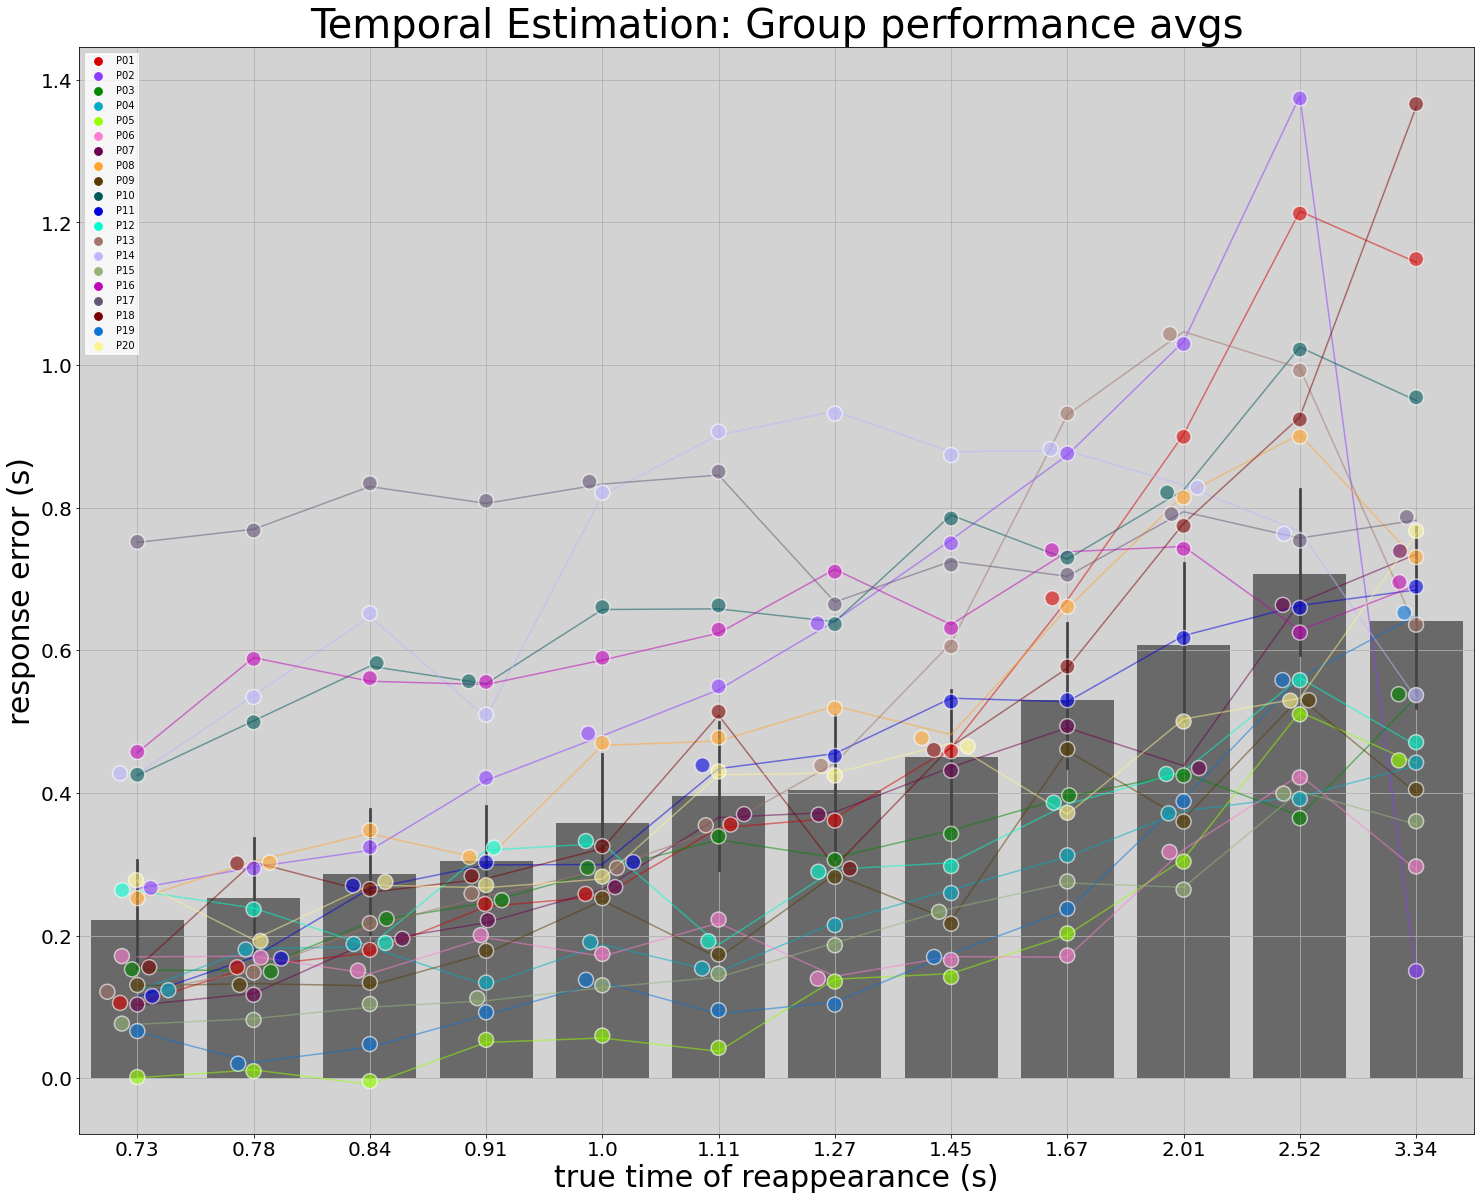

In [ ]:
'''
creating a plot of means of response time per participant
'''

dat = dataTempest.copy()

'''
code to create a new column of participant IDS with the format 01,02,...10,11
this is preferred to the format of 1,2,..10,11 while plotting because of the reading of sequential numbers in strings
'''

newptsIds = ptsIds.copy() ; newptsIds = np.array(newptsIds).flatten() ; newptsIds = newptsIds[0:9]
txtt =[]

for i, p in enumerate(newptsIds):
    x = 'P'+str(0)+str(i+1)
    txtt.append(x)
txtt = np.array(txtt).flatten()

t  = dat['participant'].unique()
txttt =t[9:20]

l = [] ; r = list(txtt) ; e = list(txttt) ; b = r+e
b = np.sort(np.flip(b))

p = dat['participant'].unique()

dat['participant1'] = dat.participant.replace(p, b, inplace=False)



'''
plotting begins
'''
import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=20)
colors = sns.color_palette(palette = 'rocket',n_colors=len(ptsIds))

#grouping for plotting
dat1 = dat.groupby(['participant1', 'participant',  'reappearance_time'])['rt'].mean().reset_index()

x = dat1['reappearance_time'].round(2)
y = dat1['rt']
z = dat1['participant1']
a = dat1['newRt'] = y-x

#init plot
f, ax = plt.subplots(figsize=(25, 20))
ax = sns.barplot(x,a, color = 'dimgrey')
poopy = sns.swarmplot(x=x,y=a, hue = z, size= 15,alpha=0.6, palette = palette, edgecolor='white', linewidth=1.5) #color = 'royalblue'

dat2 = dat1.copy()

list1 = [] # empty list for data

for i,p in enumerate(ptsIds2): #for index of current participant
    ptData = dat2.loc[dat2['participant1']=="P"+str(p),:]

    # sorting reappearance time for better plotting
    blue = np.sort(dataTempest['reappearance_time'].unique()) 
    ptData['reappear1'] = ptData.reappearance_time.replace((blue[0], blue[1], blue[2], blue[3], blue[4], blue[5], blue[6],
                                                  blue[7], blue[8], blue[9],blue[10],blue[11],),
                                                 (0, 1, 2,3,4,5,6,7,8,9,10,11), inplace=False)
    dat = ptData.groupby(['participant1', 'reappear1'])['rt'].mean().reset_index() #plot

    #put data into list for later
    list1.append(dat)

#bring above list into dataframe
dat = pd.concat(list1).reset_index()

#sorting for another plot of lines that will ID participant
x = dat['reappear1']
xx = dat1['reappearance_time']
y = dat['rt']
z = dat['participant1']
a = dat['newRt'] = y-xx
sns.lineplot(x = x,y=a, hue = z, palette = palette,alpha = 0.5, legend = False)


#clean
ax.legend()
plt.xlabel('true time of reappearance (s)', size=30)
plt.ylabel('response error (s)', size = 30)
plt.title('Temporal Estimation: Group performance avgs', size=40)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
ax.set_facecolor('lightgrey')

# plt.savefig('./Figures/Tempest_Ind_averages.jpeg',dpi=200,bbox_inches='tight')

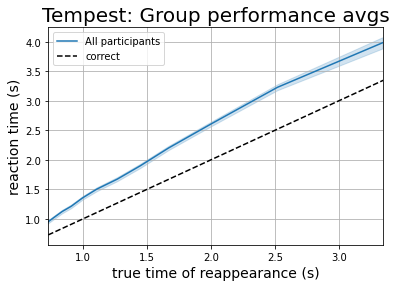

In [ ]:
'''
viewing mean performance regardless of speed
'''

dat = dataTempest.copy()
x = dat['reappearance_time'].round(2)
y = dat['rt']
z = dat['participant']

sns.lineplot(x=x, y=y, label='All participants')

plt.plot(np.arange(ptData.reappearance_time.min(),1.2*(ptData.reappearance_time.max())),np.arange(ptData.reappearance_time.min(),1.2*(ptData.reappearance_time.max())),'k--',label='correct')
plt.legend()

plt.xlabel('true time of reappearance (s)', size=14)
plt.ylabel('reaction time (s)', size = 14)
plt.title('Tempest: Group performance avgs', size=20)
plt.xlim(ptData.reappearance_time.min(),ptData.reappearance_time.max())
plt.grid()


# plt.savefig('./Figures/Tempest_Lineplot_GroupAvg_Accuracy_Per_Speed.jpeg',dpi=200,bbox_inches='tight')


### 5. Speed and sound comparison



In [ ]:
#for comparison to previous experiment, a separate dataframe in initiated using 
#data from particpants who took part in both "sound" and "speed" experiments.

dataFolderSound = './occBehP1_2022/data_sound'

# create empty list
dfs_list = []
# load, append, and concatenate datasets into the list
ptsIdsSound= [3,5,9,12,17,19,20,21,22,24,26]

numPtsSound = len(ptsIdsSound)
 
for i in range(numPtsSound):
   temp_df = pd.read_csv(dataFolderSound + "/P" + str(ptsIdsSound[i]) + "_trialmat.csv")
   #bring all created pt lists into the original list
   dfs_list.append(temp_df)
 
#bring all lists together under one pandas dataframe
dataSound = pd.concat(dfs_list)

dataSound = dataSound.reset_index()
dataSound = dataSound.drop('Unnamed: 0', axis = 1)

'''
LOADING SPEED EXPERIMENT
'''
#IDs of participants
ptsIdsSpeed = [3,12,2,6,4,1,11,19,8,20,9]
numPtsSpeed = len(ptsIdsSpeed)

# create empty list to add data from Speed
dfsList = []

# run through all participant csv's in the folder "data_speeds", create a list, and then staple all lists together
for i in range(numPtsSpeed):
    tempDf = pd.read_csv(dataFolderSpeeds + "/P" + str(ptsIdsSpeed[i]) + "_trialmat.csv")
    dfsList.append(tempDf) #bring all created pt lists into the original list

# bring all lists together under one pandas dataframe
dataSpeed = pd.concat(dfsList)

# reset index and drop index column
dataSpeed = dataSpeed.reset_index()
dataSpeed = dataSpeed.drop('Unnamed: 0', axis = 1)
dataSpeed = dataSpeed.drop('index', axis = 1)


'''
match both experiments
'''

#copy to avoid errors
datSp = dataSpeed.copy()
datSo = dataSound.copy()

#matching IDs between experiments
datSp['participant1'] = datSp.participant.replace(('P3','P12','P2','P6','P4','P1','P11','P19','P8','P20','P9'), ('P1','P2','P3', 'P4','P5','P6','P7','P8','P9','P10','P11'), inplace=False)
datSo['participant1'] = datSo.participant.replace(('P3','P5','P9','P12','P17','P19','P20','P21','P22','P24','P26'), ('P1','P2','P3', 'P4','P5','P6','P7','P8','P9','P10','P11'), inplace=False)


In [ ]:
'''
plotting
'''



''' "for data in the Speeds experiment, analyse by the unique speeds between each trial (speed_idx).
There are also two directions that an object will travel horizontally: left to right and right to left
                                                                1 = left to right; 2 = right to left
Knowing the directions, flip one direction to equal the other, i.e., (Left-to-right) X -1 = (right-to-left)

'''

dat = dataSpeeds.copy()
dat2 = dataSound.copy()



ptsIdsSpeeds = list(range(1,21))
ptsIdsSound= [3,4,5,6,7,8,9,11,12,17,18,19,20,21,22,23,24,25,26,27]
# Flip the traveling direction of object when it is traveling right to left so that it matches with left to right
# Do this for 1)when the object stopped and 2)where the subject responded
dat.loc[dat.direction == 2,'stop_pos_deg']=dat.loc[dat.direction == 2,'stop_pos_deg']*-1
dat.loc[dat.direction == 2,'pos_pressed_deg']=dat.loc[dat.direction == 2,'pos_pressed_deg']*-1


dat2.loc[dat2.direction == 2,'stop_pos_deg']=dat2.loc[dat2.direction == 2,'stop_pos_deg']*-1
dat2.loc[dat2.direction == 2,'pos_pressed_deg']=dat2.loc[dat2.direction == 2,'pos_pressed_deg']*-1


# dat.loc[dat['stop_pos_deg']]=dat.loc[dat['stop_pos_deg']]


fig, ax = plt.subplots(figsize=(25, 20))

colors = sns.color_palette('tab10') #colors for plotting within loop
list1= []

jitter = [-0.09, 0.09, 0.18]
# ax = ax.flat()
for speed in range(len(dat.speed_idx.unique())):

    toplot = dat.loc[dat['speed_idx']==speed].copy()
    means_toplot = toplot.groupby('stop_pos_deg').mean()['pos_pressed_deg']

    for i,p in enumerate(ptsIdsSpeeds):
    
        # plt.sca(ax[speed])
        # ax = ax[speed]
        ptData = dat.loc[dat['participant']=="P"+str(p),:]
        replication = ptData.loc[ptData.speed_idx==speed,:]

        #get averages
        averages = replication.groupby('stop_pos_deg').mean().reset_index()
        
        x = averages['stop_pos_deg'].round(2)
        y = averages['pos_pressed_deg'].round(2)
        z = dat['speed_idx'].unique()
        #init plot
        ax.plot(x,means_toplot,color = colors[speed], lw = 3, label = '')
        ax.plot(x,means_toplot,color = colors[speed],marker='.',lw=0,markersize = 35,mec = 'red',mew = 2, alpha= 1,)
        ax.plot(x+jitter[speed],y,color = colors[speed],marker='.',lw=0,markersize = 15, alpha= 0.5, label = '')
        # sns.stripplot(x=x+jitter[speed],y=y, color = colors[speed], size = 18, alpha= 0.5, jitter = False)
        
        
       
        list1.append(averages)




list1 = []
for i,p in enumerate(ptsIdsSound):

    # plt.sca(ax[speed])
    # ax = ax[speed]
    replication = dat2.loc[dat2['participant']=="P"+str(p),:]
    # replication = ptData.loc[ptData.speed_idx==speed,:]

    #get averages
    averages = replication.groupby('stop_pos_deg').mean().reset_index()
    
    x = averages['stop_pos_deg'].round(2)
    y = averages['pos_pressed_deg'].round(2)
    ax.plot(x,y,color = 'purple',marker='.',lw=0,markersize = 15, alpha= 0.5, label = '')
    # z = dat['speed_idx'].unique()
    #init plot
    list1.append(averages)
'''
plotting line for the 3 speeds
'''

averages = pd.concat(list1)
averages = averages.groupby('stop_pos_deg').mean().reset_index()

x = averages['stop_pos_deg'].round(2)
y = averages['pos_pressed_deg'].round(2)
ax.plot(x,y,color = 'purple', lw = 3, label = '')
ax.plot(x,y,color = 'purple',marker='.',lw=0,markersize = 35,mec = 'red',mew = 2, alpha= 1,)
ax.plot(x,y,color = colors[speed],marker='.',lw=0,markersize = 15, alpha= 0.5, label = '')


plt.legend()

dat = dataSpeeds.copy()
dat.loc[dat.direction == 2,'stop_pos_deg']=dat.loc[dat.direction == 2,'stop_pos_deg']*-1
dat.loc[dat.direction == 2,'pos_pressed_deg']=dat.loc[dat.direction == 2,'pos_pressed_deg']*-1

# #bar showing the "perfect performance"
plt.plot(np.arange(dat.stop_pos_deg.min(),dat.stop_pos_deg.max()),np.arange(dat.stop_pos_deg.min(),dat.stop_pos_deg.max()),'k--',label='correct')

'''
adding chart features
'''


import matplotlib.patches as mpatches


blue_patch = mpatches.Patch(color=colors[0], label='23.5 deg/s')
ora_patch = mpatches.Patch(color=colors[1], label='10.1 deg/s')
green_patch = mpatches.Patch(color=colors[2], label='5.0 deg/s')
pur_patch = mpatches.Patch(color='purple', label='Sound ex, 10.1 deg/s')

import matplotlib.lines as mlines
blue_star = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                          markersize=35, fillstyle = 'none' ,label='Mean')

correct_line = mlines.Line2D([], [], color='black', linestyle='--',
                          markersize=35, fillstyle = 'none' ,label='Correct')


plt.legend(handles=[blue_patch, ora_patch,green_patch, pur_patch ,blue_star, correct_line], title = 'Speed of trial')
# plt.legend()
# ax.legend( labels = dat['deg_per_sec'].unique().round(1),title = 'Deg/s', labelcolor= (colors[0], colors[1], colors[2]),)
# plt.legend(handles=[blue])

plt.xlabel('true stopping position (dva)', size = 30)
plt.ylabel('response (dva)',size = 30)
# plt.xticks(dat['stop_pos_deg'].unique().round(2))
plt.title('Speeds Vs Sound: N=20', size = 40)
plt.grid(which='both')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.set_xticks(averages['stop_pos_deg'].round(2).unique())
ax.set_facecolor('lightgrey')

plt.savefig('./occBehP2_2022/Figures/cross_sound_speed_N20.jpeg',dpi=200,bbox_inches='tight')